# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [117]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how = "left")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [118]:
# Checking the number of mice.
mice_count = merge_df["Mouse ID"].nunique()
mice_count

249

In [119]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_id = merge_df[["Mouse ID", "Timepoint"]].duplicated(keep=False)
duplicate_ids = merge_df.loc[mice_id, "Mouse ID"].unique()
duplicate_ids

array(['g989'], dtype=object)

In [120]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicate_ids = merge_df.loc[merge_df["Mouse ID"] == 'g989']
all_duplicate_ids

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [121]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df[merge_df["Mouse ID"].isin(duplicate_ids) == False]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [122]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
study_mean = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
study_median = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
study_variance = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
study_stdev = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
study_sem = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame({
    "Tumor Volume Mean" : study_mean,
    "Tumor Volume Median" : study_median,
    "Tumor Volume Variance" : study_variance,
    "Tumor Volume Standard Deviation" : study_stdev,
    "Tumor Volume Standard Error" : study_sem,
})

summary_table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [124]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_table_advanced = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
# Using the aggregation method, produce the same summary statistics in a single line
summary_table_advanced

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

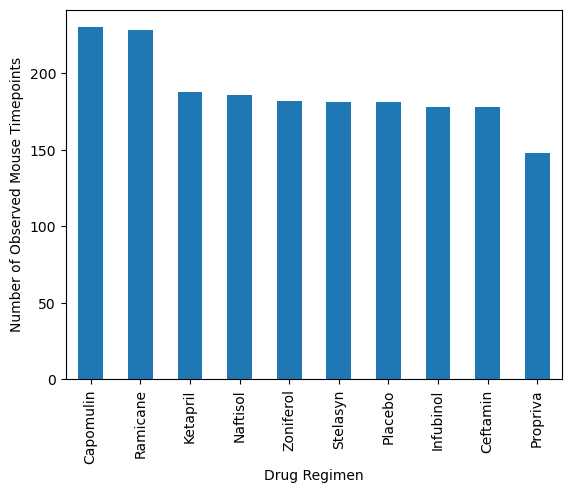

In [125]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_bar = cleaned_df["Drug Regimen"].value_counts()

drug_regimen_bar.plot(kind = "bar")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")

plt.show()

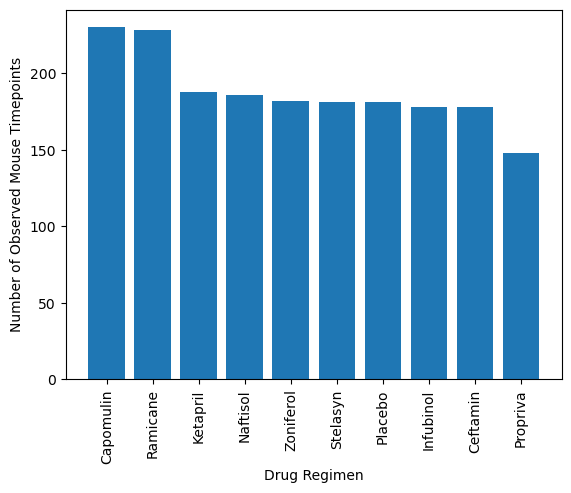

In [126]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = cleaned_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(y_axis))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(tick_locations, y_axis.index.values, rotation=90)

plt.show()

<Axes: ylabel='Count'>

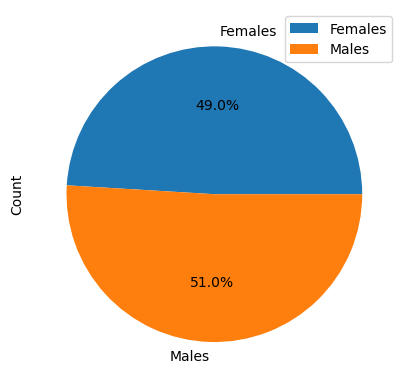

In [127]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
female_mice = cleaned_df.loc[cleaned_df["Sex"] == "Female"]
male_mice = cleaned_df.loc[cleaned_df["Sex"] == "Male"]

# Get the unique mice with their gender
female_mice_count = len(female_mice["Mouse ID"])
male_mice_count = len(male_mice["Mouse ID"])

# Make the pie chart
mice_sex = [["Females", int(female_mice_count)], ["Males", int(male_mice_count)]]

mice_sex_df = pd.DataFrame(mice_sex, columns = ["Sex", "Count"])
mice_sex_df = mice_sex_df.set_index("Sex")

# Show pie chart
mice_sex_df.plot(kind = "pie", y = "Count", autopct = "%1.1f%%")

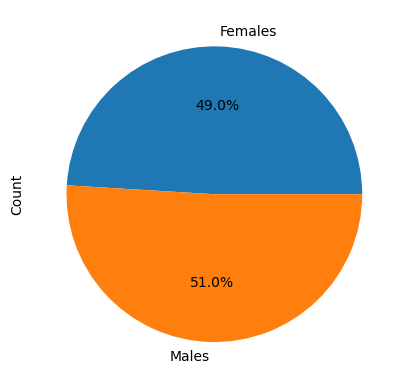

In [128]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
mice_sex_list = [female_mice_count, male_mice_count]

# Make the pie chart
plt.ylabel("Count")
plt.pie(mice_sex_list, labels = ["Females", "Males"], autopct = "%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [129]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint = cleaned_df.groupby(["Mouse ID"]).agg(Timepoint = ("Timepoint", "max"))

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint = mouse_timepoint.merge(cleaned_df, how = "left", on = ["Mouse ID", "Timepoint"])


In [130]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumor_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in regimens:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = greatest_timepoint.loc[greatest_timepoint["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # add subset
    tumor_data_list.append(drug_data)
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    upper_bound = upperq + (1.5 * iqr)
    lower_bound = lowerq - (1.5 * iqr)
    
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    print(f"{treatment} potential outliers: {outliers}\n")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



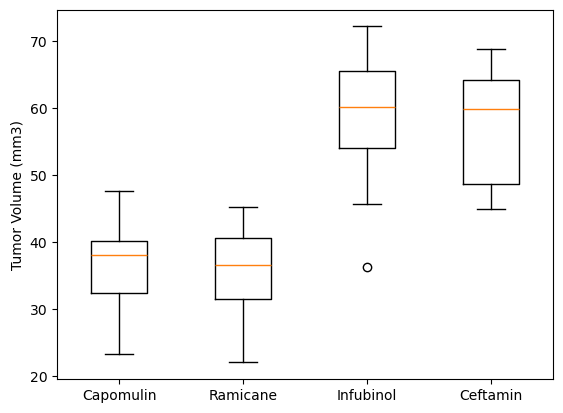

In [131]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_data_list, tick_labels = regimens)
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

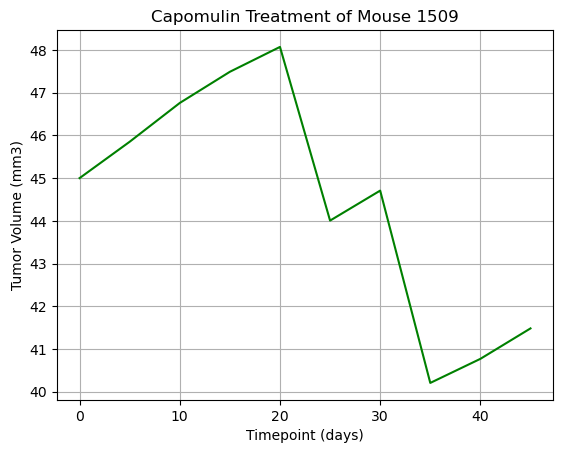

In [132]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = "Capomulin"
mouse_id = "l509"
capomulin_plot = cleaned_df[(cleaned_df["Mouse ID"] == mouse_id) & (cleaned_df["Drug Regimen"] == capomulin)]

plt.plot(capomulin_plot['Timepoint'], capomulin_plot['Tumor Volume (mm3)'], linestyle='-', color='green')

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse 1509")
plt.grid(True)

plt.show()

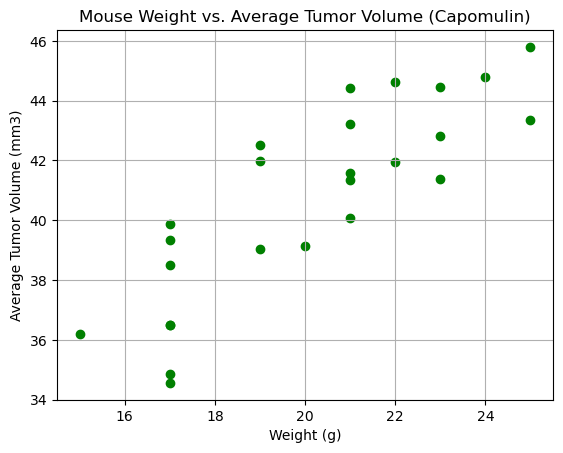

In [133]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = cleaned_df[cleaned_df["Drug Regimen"] == capomulin]

capomulin_tumor_vol = capomulin_df.groupby("Mouse ID").mean(numeric_only = True)

plt.scatter(capomulin_tumor_vol['Weight (g)'], capomulin_tumor_vol['Tumor Volume (mm3)'], color = 'green')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.grid(True)

plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient

co_co = st.pearsonr(capomulin_tumor_vol['Mouse Weight (g)'], capomulin_tumor_vol['Tumor Volume (mm3)'])[0]
print(f"The Correlation Coefficient between mouse weight and the average tumor volume for the entire Capomulin regimen is {co_co:.2f}")


# Linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_tumor_vol['Weight (g)'], capomulin_tumor_vol['Tumor Volume (mm3)'])
regress_values = (capomulin_tumor_vol['Weight (g)'] * slope + intercept)

plt.scatter(capomulin_tumor_vol['Weight (g)'], capomulin_tumor_vol['Tumor Volume (mm3)'], color = 'green')

plt.plot(capomulin_tumor_vol['Weight (g)'], regress_values, "r-")

plt.title("Linear Regression of Mouse Weight & Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

plt.show()

KeyError: 'Mouse Weight (g)'